# SVM


## Package Loading

In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
import seaborn as sns
Categories=['trash','recycle','organics', 'hazardous']

## Mount to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Data

### Load Training Data

In [3]:
flat_data_arr=[]
target_arr=[]

#mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/APS360/APS360data/train'
for i in Categories:
  print(f'loading... category for training data: {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_train=pd.DataFrame(flat_data)
df_train['Target']=target
df_train

loading... category for training data: trash
loaded category:trash successfully
loading... category for training data: recycle
loaded category:recycle successfully
loading... category for training data: organics
loaded category:organics successfully
loading... category for training data: hazardous
loaded category:hazardous successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.867272,0.820213,0.773154,0.872557,0.825499,0.778440,0.877068,0.830009,0.782951,0.874605,...,0.313720,0.298034,0.250975,0.311731,0.296045,0.248986,0.306487,0.290801,0.243742,0
1,0.925490,0.874510,0.800000,0.925490,0.874510,0.800000,0.925490,0.874510,0.800000,0.925493,...,0.329406,0.290191,0.243132,0.327417,0.288202,0.241143,0.322174,0.282958,0.235899,0
2,0.469778,0.430189,0.389516,0.396331,0.348160,0.309935,0.382812,0.329176,0.292153,0.559668,...,0.417065,0.405300,0.370004,0.399644,0.387878,0.352582,0.383248,0.371482,0.336186,0
3,0.941176,0.882353,0.800000,0.941134,0.882311,0.799958,0.938537,0.879713,0.797360,0.937258,...,0.328130,0.292836,0.234012,0.325532,0.290238,0.231415,0.325490,0.290196,0.231373,0
4,0.913725,0.847059,0.776471,0.913726,0.847059,0.776471,0.913766,0.847099,0.776511,0.913788,...,0.344481,0.313108,0.262128,0.341765,0.310392,0.259412,0.337543,0.306171,0.255190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.368884,0.415995,0.368910,0.593235,0.647702,0.597301,0.312999,0.375802,0.324696,0.701930,...,0.433990,0.476438,0.460850,0.409989,0.449471,0.416027,0.405310,0.442813,0.401809,3
596,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
597,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
598,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3


In [4]:
x_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]

### Loading Validation data

In [5]:
flat_data_arr=[]
target_arr=[]

#mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/APS360/APS360data/val'
for i in Categories:
  print(f'loading... category for training data: {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_val=pd.DataFrame(flat_data)
df_val['Target']=target
df_val

loading... category for training data: trash
loaded category:trash successfully
loading... category for training data: recycle
loaded category:recycle successfully
loading... category for training data: organics
loaded category:organics successfully
loading... category for training data: hazardous
loaded category:hazardous successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.858824,0.772549,0.717647,0.858866,0.772591,0.717689,0.861463,0.775189,0.720287,0.862737,...,0.397913,0.358698,0.311639,0.390265,0.351049,0.303990,0.381045,0.341829,0.294770,0
1,0.890196,0.831373,0.756863,0.890196,0.831373,0.756863,0.890196,0.831373,0.756863,0.890196,...,0.443042,0.407747,0.341081,0.440052,0.404758,0.338091,0.435760,0.400466,0.333799,0
2,0.920723,0.814841,0.771704,0.915974,0.810092,0.766955,0.916441,0.810559,0.767421,0.917642,...,0.815880,0.745291,0.698233,0.814047,0.743459,0.696400,0.809532,0.738944,0.691885,0
3,0.756863,0.694118,0.631373,0.756901,0.694156,0.631411,0.758072,0.695327,0.632581,0.754711,...,0.313963,0.274747,0.227688,0.309859,0.270644,0.223585,0.309804,0.270588,0.223529,0
4,0.874510,0.807843,0.737255,0.874468,0.807801,0.737213,0.871870,0.805203,0.734615,0.870594,...,0.379754,0.352303,0.289558,0.367099,0.339648,0.276903,0.358534,0.331083,0.268338,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3
196,0.931196,0.660444,0.532391,0.535821,0.356894,0.258889,0.275383,0.262531,0.217312,0.117830,...,0.336149,0.348276,0.375546,0.335004,0.352116,0.384073,0.331935,0.359138,0.390593,3
197,0.185076,0.177233,0.196841,0.211777,0.203934,0.223542,0.161741,0.153898,0.173506,0.222858,...,0.180131,0.178406,0.146239,0.152648,0.145206,0.100137,0.134322,0.123909,0.073011,3
198,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.988244,0.988244,0.988244,0.998950,0.998950,0.998950,0.998321,0.998321,0.998321,3


In [6]:
x_val=df_val.iloc[:,:-1]
y_val=df_val.iloc[:,-1]

### Loading Test Data

In [8]:
flat_data_arr=[]
target_arr=[]

#mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/APS360/APS360data/test2'
for i in Categories:
  print(f'loading... category for training data: {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_test=pd.DataFrame(flat_data)
df_test['Target']=target
df_test

loading... category for training data: trash
loaded category:trash successfully
loading... category for training data: recycle
loaded category:recycle successfully
loading... category for training data: organics
loaded category:organics successfully
loading... category for training data: hazardous
loaded category:hazardous successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.800000,0.729412,0.674510,0.800000,0.729412,0.674510,0.800000,0.729412,0.674510,0.800003,...,0.292836,0.261463,0.218326,0.290238,0.258866,0.215728,0.290196,0.258824,0.215686,0
1,0.890196,0.831373,0.756863,0.890196,0.831373,0.756863,0.890196,0.831373,0.756863,0.890196,...,0.443042,0.407747,0.341081,0.440052,0.404758,0.338091,0.435760,0.400466,0.333799,0
2,0.886275,0.811765,0.752941,0.886275,0.811765,0.752941,0.886275,0.811765,0.752941,0.886272,...,0.324208,0.284993,0.237934,0.321611,0.282395,0.235336,0.321569,0.282353,0.235294,0
3,0.842532,0.779787,0.728807,0.837289,0.774543,0.723563,0.835224,0.772479,0.721498,0.831471,...,0.909804,0.862745,0.815686,0.909804,0.862745,0.815686,0.909804,0.862745,0.815686,0
4,0.784314,0.713725,0.674510,0.784397,0.713809,0.674593,0.789553,0.718965,0.679749,0.792089,...,0.401262,0.369890,0.326752,0.403820,0.372448,0.329310,0.403862,0.372489,0.329352,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.128164,0.111990,0.851913,0.143088,0.120268,0.853057,0.151143,0.121826,0.852614,0.171964,...,0.567922,0.589372,0.935137,0.567284,0.588852,0.935070,0.568430,0.589935,0.935240,3
196,0.801765,0.754743,0.958156,0.799509,0.752011,0.957736,0.799347,0.751013,0.957526,0.799556,...,0.643259,0.623572,0.937321,0.645683,0.625681,0.937769,0.647038,0.627255,0.937975,3
197,0.756220,0.752645,0.958142,0.753609,0.749911,0.957698,0.753612,0.749696,0.957630,0.759661,...,0.661358,0.642186,0.938343,0.661742,0.641945,0.938303,0.666785,0.645996,0.938993,3
198,0.526636,0.419587,0.895406,0.531432,0.422133,0.895921,0.533279,0.424051,0.896294,0.533264,...,0.634565,0.593021,0.928809,0.638765,0.597106,0.929491,0.641163,0.599785,0.930108,3


In [9]:
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]

# Grid Search

I have done the grid search for different set of hyperparameters:

C: [0.1, 1, 10, 100]

gamma: [0.0001, 0.001, 0,1, 1]

kernel: [rpf, poly]

Here I only shows the final result of the best set of parameters, which is C=100, gamma=0.0001 and kernel is rbf

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [11]:
param_grid={'C':[100],'gamma':[0.0001],'kernel':['rbf']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
y_pred_val=model.predict(x_val)

svm_val_precision = precision_score(y_val, y_pred_val, average='weighted')  # evaluate precision on val set
svm_val_recall = recall_score(y_val, y_pred_val, average='weighted')        # evaluate recall on val set
svm_val_F1_score = f1_score(y_val, y_pred_val, average = 'weighted')        # evaluate F1-score on val set

print(f'SVM on validation set has a weighted precision of: {svm_val_precision}')
print(f'SVM on validation set has a weighted recall of: {svm_val_recall}')
print(f'SVM on validation set has a weighted F1-score of:  {svm_val_F1_score}')

SVM on validation set has a weighted precision of: 0.7166470183711563
SVM on validation set has a weighted recall of: 0.71
SVM on validation set has a weighted F1-score of:  0.707317572228653


## Confusion Matrix On Validation Set

In [12]:
def confusion_matrix_creation_SVM(y_test, y_pred_test, col_names, modelName, color):

    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as pl
    import numpy as np

    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    pl.figure(figsize=(12,8))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f", cmap=color, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    pl.xticks(tick_marks + 0.5, col_names)
    pl.yticks(tick_marks + 0.5, col_names, rotation=0)
    pl.xlabel('Predicted label')
    pl.ylabel('True label')
    pl.title(f'Confusion Matrix of {modelName}')
    pl.show()

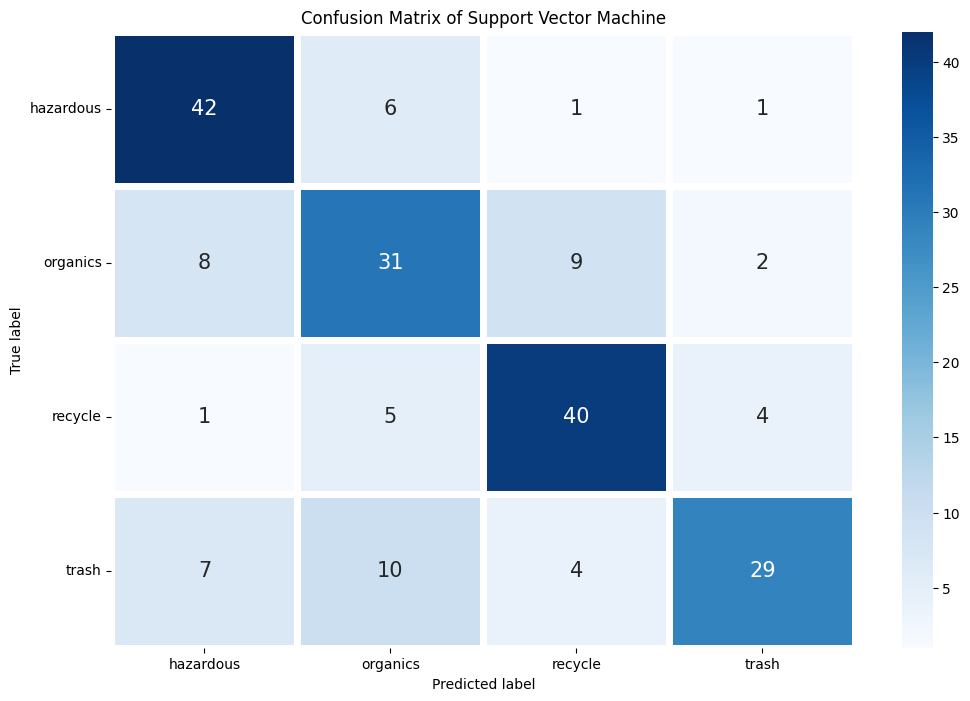

In [13]:
confusion_matrix_creation_SVM(y_val, y_pred_val,['hazardous', 'organics', 'recycle', 'trash'], "Support Vector Machine", "Blues")

# Performance on the test set

In [14]:
y_pred_test=model.predict(x_test)
svm_test_precision = precision_score(y_test, y_pred_test, average='weighted')  # evaluate precision on test set
svm_test_recall = recall_score(y_test, y_pred_test, average='weighted')        # evaluate recall on test set
svm_test_F1_score = f1_score(y_test, y_pred_test, average = 'weighted')        # evaluate F1-score on test set
test_accuracy = model.score(x_test, y_test)

print(f'SVM on test set has a weighted precision of: {svm_test_precision}')
print(f'SVM on test set has a weighted recall of: {svm_test_recall}')
print(f'SVM on test set has a weighted F1-score of: {svm_test_F1_score}')
print(f'SVM on test set has a accuracy of: {test_accuracy}')

SVM on test set has a weighted precision of: 0.5640560620671518
SVM on test set has a weighted recall of: 0.565
SVM on test set has a weighted F1-score of: 0.5620149852823121
SVM on test set has a accuracy of: 0.565


## Confusion Matrix On Test Set

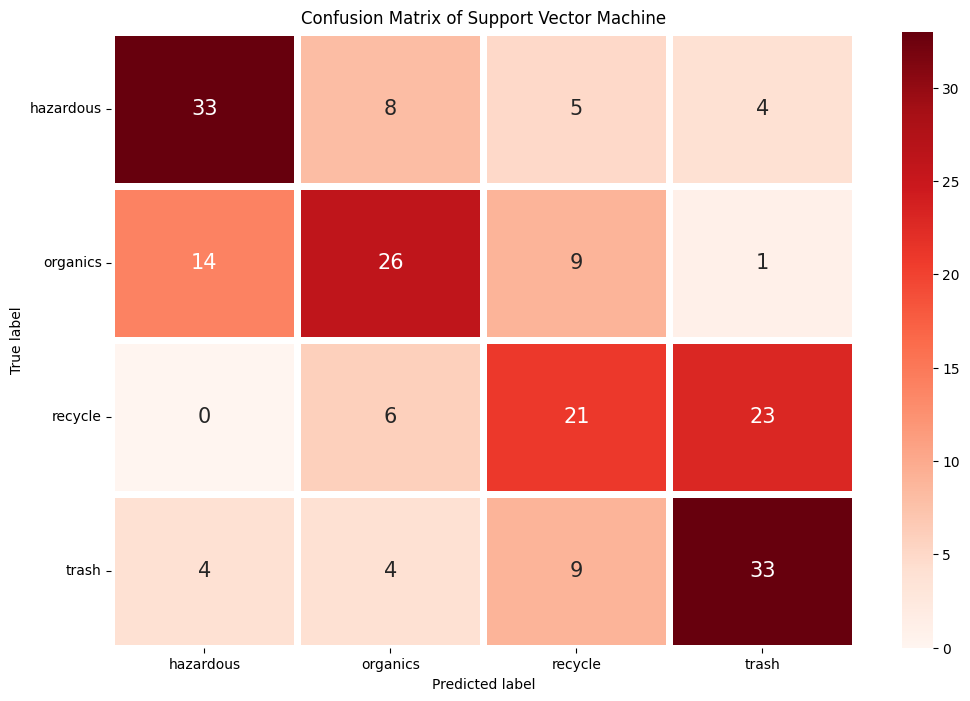

In [15]:
confusion_matrix_creation_SVM(y_test, y_pred_test,['hazardous', 'organics', 'recycle', 'trash'], "Support Vector Machine", "Reds")